In [1]:
%matplotlib inline

In [2]:
from umachine_pyio.load_mock import value_added_mock, load_mock_from_binaries
subvolumes = np.random.choice(np.arange(144), 50, replace=False)
vamock = value_added_mock(load_mock_from_binaries(subvolumes), 250)
print(vamock.keys())

from umachine_pyio.load_mock import get_snapshot_times
cosmic_age_array = get_snapshot_times()

Total runtime = 16.03 seconds


In [72]:
ssfr_history = np.where(vamock['sm_history_main_prog'] == 0, 
                        -np.inf, np.log10(vamock['sfr_history_main_prog']/vamock['sm_history_main_prog']))

ssfr1, ssfr2 = -11.25, -9
prob1, prob2 = 0.02, 0.5
prob_disrupt_history = np.interp(ssfr_history, [ssfr1, ssfr2], [prob1, prob2])

In [73]:
sm_min, sm_max = 10**10, 10**10.1
sm_mask = (vamock['sm'] >= sm_min) & (vamock['sm'] < sm_max)
ngals_sm_bin = np.count_nonzero(sm_mask)
print("Number of galaxies in the sample = {0}".format(ngals_sm_bin))

sm_min2, sm_max2 = 10**11, 10**11.25
sm_mask2 = (vamock['sm'] >= sm_min2) & (vamock['sm'] < sm_max2)
ngals_sm_bin2 = np.count_nonzero(sm_mask2)
print("Number of galaxies in the sample = {0}".format(ngals_sm_bin2))


Number of galaxies in the sample = 11252
Number of galaxies in the sample = 8293


iplot1, iplot2 = 1854, 5022


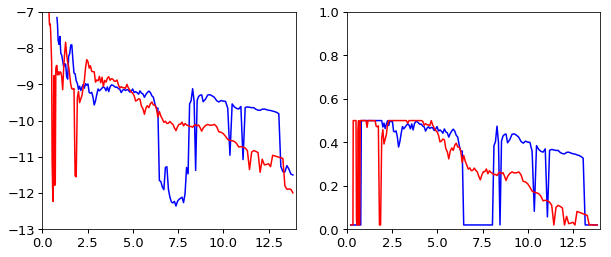

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

iplot = np.random.randint(0, ngals_sm_bin-1); iplot2 = np.random.randint(0, ngals_sm_bin2-1)


__=ax1.plot(cosmic_age_array, ssfr_history[sm_mask][iplot, :], color='blue')
__=ax2.plot(cosmic_age_array, prob_disrupt_history[sm_mask][iplot, :], color='blue')

__=ax1.plot(cosmic_age_array, ssfr_history[sm_mask2][iplot2, :], color='red')
__=ax2.plot(cosmic_age_array, prob_disrupt_history[sm_mask2][iplot2, :], color='red')

xmin, xmax = 0, 14
__=ax1.set_xlim(xmin, xmax); __=ax2.set_xlim(xmin, xmax)
ymin1, ymax1 = -13, -7; ymin2, ymax2 = 0, 1 
__= ax1.set_ylim(ymin1, ymax1); __= ax2.set_ylim(ymin2, ymax2)
print("iplot1, iplot2 = {0}, {1}".format(iplot, iplot2))



In [65]:
# from astropy.cosmology import Planck15
# ax1a = ax1.twiny()
# z_values = np.array((0.5, 1, 2, 5))
# new_tick_locations = Planck15.age(z_values).value
# __=ax1a.set_xticks(new_tick_locations)
# __=ax1a.set_xticklabels(z_values)
# __=ax1a.set_xlim(-10, 0)
# print(new_tick_locations)